<a href="https://colab.research.google.com/github/smritiguleria/demo_wscubepython/blob/main/CNN_APPLY_ON_MNSIT_DATASET_iypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


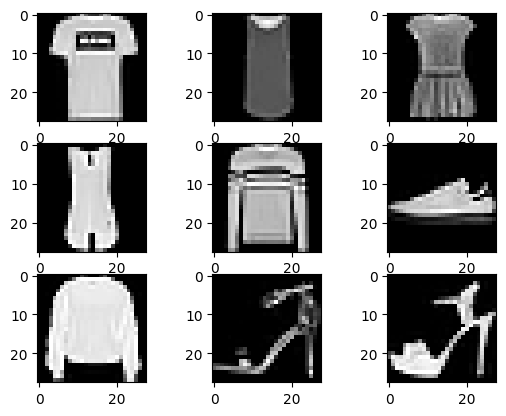

In [10]:
for i in range(1, 10):

    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)

    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [14]:
def model_arch():
    models = Sequential()

    # We are learning 64
    # filters with a kernal size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # Max pooling will reduce the
    # size with a kernal size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))

    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [16]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 256)        

In [ ]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
 48/100 [=============>................] - ETA: 5:45 - loss: 2.9195 - sparse_categorical_accuracy: 0.5107

In [ ]:
model.save_weights('./model.h5', overwrite=True)

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()